<h1>Does meditation improve your sleep quality?</h1>
<p> This research is about improving sleep quality via a meditation app called headspace. For this research the participant had a baseline of 10 days going to sleep without meditation. To minimize the use of a mobile phone before sleep the participant had the option to listen to a podcast or read a book. </p>

<h2>Link to sources</h2>
<li><a href="https://www.withings.com/nl/en/?utm_source=CJ&utm_medium=Affiliate&utm_campaign=affiliation-BWerbIT+UG+%28haftungsbeschraenkt%29&utm_content=3044233-Home+Page+Worlwide-13184187&CJEVENT=d9f4ef30a8a611ed812f00af0a18b8fb&cjdata=MXxZfDB8WXww">Withings</a> <p>For this research the Withings sleep analyzer was used. This is a device that the participant has to place under his or her bed. Many variables are being measured during the night when the particpant is asleep. The data that is going to be collected from this device are the heartrate and, the sleepstage.
    
<li><a href="https://www.med.upenn.edu/cbti/assets/user-content/documents/Pittsburgh%20Sleep%20Quality%20Index%20(PSQI).pdf">PSQI</a> <p>The participant filled in a PSQI every week which gives a score on how well the participant has slept

<h2> Imported libraries

In [29]:
from bokeh.io import output_notebook
from bokeh.models import FixedTicker, DatetimeTickFormatter, VBar, ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.transform import dodge 

from datetime import datetime, timedelta


import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import re

from scipy.stats import iqr 
from scipy.stats import norm
from scipy.stats import ttest_rel
from scipy.stats import t as t_distr
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
import yaml
import panel as pn
pn.extension()
output_notebook()

Loading BokehJS ...

<h2> Load data

In [2]:
def get_config():
    
    with open ("config.yaml", "r") as config:
        config = yaml.safe_load(config)
    return config

person4sleep = get_config()['person4sleep']
person4hr = get_config()['person4hr']
person4_PSQI = get_config()['person4PSQI']



<h2>Cleaning the data</h2>

In [3]:
#person4
df4 = pd.read_csv(person4sleep)
df4['start'] = pd.to_datetime(df4['start'], utc=False)
df4.sort_values(by=['start'])
df4 = df4.drop_duplicates(subset="start", keep = 'first')
df4 = df4.reset_index()
df4_hr = pd.read_csv(person4hr)
df4_hr['start'] = pd.to_datetime(df4_hr['start'], utc=False)
df4_hr.sort_values(by=['start'])
df4_hr = df4_hr.drop_duplicates(subset="start", keep = 'first')
df4_hr = df4_hr.reset_index()
df4_PSQI = pd.read_excel(person4_PSQI, index_col=0)  
df4_PSQI = df4_PSQI[df4_PSQI['Name'] == 4]

<h3>dataframes before cleaning</h3>

In [4]:
df4_PSQI

,Start time,Completion time,Name,What time did you gone to bed at night?,How long has it taken you fall to sleep?,How late have you gotten up in the morning?,How many hours did you actually sleep in the night?,Hours in bed,Cannot get to sleep within 30 minutes,Wake up in the middle of the night or early morning,...,How often have you taken medicine to help sleep (please subscribe or not prescribed medicine in excel file),"How often have you had trouble staying awake while driving, eating meals or engaging in social activity",How much of a problem has it been for you to keep up enough enthusiasm to get things done?,How would you rate your sleep quality overall?,Do you have a bed partner or room mate?,"If you have a room mate or bed partner, ask him/her how often in the past week you have had:\nLoud snoring","If you have a room mate or bed partner, ask him/her how often in the past week you have had:\nLong pauses between breaths while sleep","If you have a room mate or bed partner, ask him/her how often in the past week you have had:\nLegs twitching or jerking while you sleep","If you have a room mate or bed partner, ask him/her how often in the past week you have had:\nEpisodes of disorientation or confusion during sleep","If you have a room mate or bed partner, ask him/her how often in the past week you have had:\nOther restlessness while you sleep, please describe in excel file"
ID,,,,,,,,,,,,,,,,,,,,,
1,2022-11-25 08:56:47,2022-11-25 09:03:10,4,00:00:00,20,09:00:00,7.5,9.0,Once a week,Three or more times a week,...,Not during the week,Once a week,Only a very slight problem,Fairly bad,No bed partner or room mate,Not during the week,Not during the week,Not during the week,Not during the week,Not during the week
4,2022-12-02 08:38:27,2022-12-02 08:44:20,4,00:00:00,40,08:30:00,7.0,8.0,Three or more times a week,Three or more times a week,...,Not during the week,Not during the week,No problem at all,Very bad,No bed partner or room mate,Not during the week,Not during the week,Not during the week,Not during the week,Not during the week
6,2022-12-09 09:11:22,2022-12-09 09:14:48,4,00:00:00,60,09:00:00,8.0,9.0,Twice a week,Three or more times a week,...,NaN,Not during the week,No problem at all,Fairly good,No bed partner or room mate,Not during the week,Not during the week,Not during the week,Not during the week,Not during the week
11,2023-01-19 11:34:13,2023-01-19 11:37:00,4,00:00:00,25,08:00:00,6.5,8.0,Twice a week,Once a week,...,Not during the week,Not during the week,No problem at all,Fairly good,No bed partner or room mate,Not during the week,Not during the week,Not during the week,Not during the week,Not during the week


In [5]:
df4

,index,start,duration,value
0,0,2022-12-19 00:02:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
1,1,2022-12-19 03:02:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1..."
2,2,2022-12-19 06:02:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3..."
3,6,2022-12-15 22:23:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
4,7,2022-12-16 00:48:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
...,...,...,...,...
128,258,2022-11-21 23:05:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
129,259,2022-11-22 00:01:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2..."
130,260,2022-11-22 03:01:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3..."
131,261,2022-11-22 06:01:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,3,3,3..."


In [6]:
df4_hr

,index,start,duration,value
0,0,2022-12-19 00:02:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[57,56,58,57,56,57,63,55,56,57,57,60,61,58,61,..."
1,1,2022-12-19 03:02:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[62,57,54,52,52,52,52,48,49,51,50,47,50,51,50,..."
2,2,2022-12-19 06:02:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[56,57,58,59,60,59,62,62,57,60,61,61,63,63,60,..."
3,6,2022-12-15 22:23:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[63,65,65,67,67,65,66,65,65,65,63,67,67,68,70,..."
4,7,2022-12-16 00:48:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[60,62,64,65,65,66,63,63,64,63,64,66,65,66,65,..."
...,...,...,...,...
128,258,2022-11-21 23:05:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[72,68,68,68,68,69,66,67,71,69,68,67,67,66,69,..."
129,259,2022-11-22 00:01:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[66,62,62,63,63,61,61,61,62,61,62,63,61,62,62,..."
130,260,2022-11-22 03:01:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[59,57,60,60,61,61,62,66,64,66,63,66,67,67,65,..."
131,261,2022-11-22 06:01:00+01:00,"[60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,...","[60,60,56,53,56,53,58,59,54,54,58,59,59,59,60,..."


<h3>cleaning the dataframe</h3>
The data from withings comes as a csv file. This is raw data that is not usefull yet to do analysis on and make visualizations. To make this dataframe clean the function add_count provides an extra column to add a day from 0(first day) up to the last day. The function clean_dataframe counts how many of the same value is in the row. when the value changes it makes a new row for that sleepstate with a duration calculated count of value * 60(duration in seconds). This is also done for the heartrate of the participant.

In [7]:
def add_count(df):
    count = 1
    for index, row in df.iterrows():
        df.loc[df['start'] ==row['start'], 'day_of_sleep'] = count
        if (df.loc[(df['hour'] <12) & (df['start'].dt.day == row['start'].day) & (df['start'].dt.month == row['start'].month)]['start'].max() == row['start']):
            
            count +=1
    df['day_of_sleep'] = df['day_of_sleep'].astype(int)        
    return df        
def clean_dataframe(df, df_hr):
    df['value'] = df['value'].apply(''.join).str.replace('[^\d\s]+', '')
    data = []

    for index, row in df.iterrows():
        heartrates = re.findall('\d{1,3}', df_hr.iloc[index]['value'])
        heartrates = [int(x) for x in heartrates]
        time = row['start']
        sleeptype = 0
        start_hr = 0 
        count = 0
        for value_index, value in enumerate(row['value']):


            if int(value) == int(sleeptype):
                count += 1
            else:
                data.append([time, (count*60), sleeptype, heartrates[start_hr:start_hr+count]])
                time = time + timedelta(seconds=(count*60))
                start_hr = count
                count = 0
                sleeptype = value
                count +=1

            if count == len(row['value']):
                data.append([time, (count*60), sleeptype, heartrates[start_hr:start_hr+count]])
                continue
            if (value_index+1) == len(row['value']):
                data.append([time, (count*60), sleeptype, heartrates[start_hr:start_hr+count]])

    df = pd.DataFrame(data)
    df.columns = ['start', 'duration(s)', 'sleeptype', 'heartrate']
    df = df[df['duration(s)'] != 0]
    
    df.loc[df["sleeptype"] == 0, "sleeptype_word"] = 'awake'
    df.loc[df["sleeptype"] == '0', "sleeptype_word"] = 'awake'
    df.loc[df["sleeptype"] == '1', "sleeptype_word"] = 'light'
    df.loc[df["sleeptype"] == '2', "sleeptype_word"] = 'deep'
    df.loc[df["sleeptype"] == '3', "sleeptype_word"] = 'rem'
    
    df.loc[df["sleeptype_word"] == 'awake', "sleeptype"] = '3'
    df.loc[df["sleeptype_word"] == 'light', "sleeptype"] = '2'
    df.loc[df["sleeptype_word"] == 'deep', "sleeptype"] = '1'
    df.loc[df["sleeptype_word"] == 'rem', "sleeptype"] = '0'
    df.sort_values(by=['start'], inplace=True)
    df['start'] = pd.to_datetime(df['start'], format="%m/%d/%Y %I:%M:%S")
    df['hour'] = df['start'].dt.hour
    return df


In [8]:
df4 = clean_dataframe(df4, df4_hr)

C:\Users\MIKEWI~1\AppData\Local\Temp/ipykernel_28944/2001387702.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['value'] = df['value'].apply(''.join).str.replace('[^\d\s]+', '')


In [9]:
#measurements that didn't make any sense so they will be removed
indexes_to_be_removed_person4 = [
    596, 566, 567, 568, 569, 570, 572, 573, 574, 575, 576, 577, 579, 580,
    581, 582, 583, 584, 585, 586, 587, 589, 591, 592, 593, 552, 553, 554, 
    555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 503, 504, 505, 
    506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 
    520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 433, 434,
    435, 436, 410, 411, 412, 379, 378, 381, 348, 319, 226, 227, 228, 229, 
    230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 
    246, 247, 248, 249, 250, 251, 253, 254, 255, 256, 257, 258, 175, 176, 
    177, 178, 179, 180, 183, 184, 181, 182, 185, 190, 191, 186, 187, 192, 
    188, 193, 198, 199, 194, 195, 200, 196, 201, 207, 202, 208, 203, 209, 
    204, 210, 205, 211, 215, 216, 212, 213, 217, 222, 218, 223, 219, 224,
    220, 225, 130, 131, 132, 133, 139, 134, 140, 135, 141, 136, 142, 137, 
    143, 145, 146, 147,52, 53, 23, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161,
            162, 163, 165, 166, 167, 168, 170, 171, 172, 173, 79,  80,  81,  82,  83,  84,  86,  87,  88,  89,  90,  91,  92,
             93,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
            107, 109, 110, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72,
            73, 74, 75, 76, 77, 78
]

df4 = df4.drop(index=indexes_to_be_removed_person4)


In [10]:
df4 = add_count(df4)

In [11]:
# removed 2 days from baseline cause there were only 7 recorded days of sleep with meditation
df4 = df4.loc[(df4['day_of_sleep'] != 8) & (df4['day_of_sleep'] != 9)]
#redo the count
df4 = add_count(df4)

In [12]:
df4['person'] = '4'

In [13]:
df = df4

<h3>dataframes after cleaning</h3>

In [14]:
df

,start,duration(s),sleeptype,heartrate,sleeptype_word,hour,day_of_sleep,person
675,2022-11-21 23:05:00+01:00,3360,3,"[72, 68, 68, 68, 68, 69, 66, 67, 71, 69, 68, 6...",awake,23,1,4
677,2022-11-22 00:01:00+01:00,1020,2,"[66, 62, 62, 63, 63, 61, 61, 61, 62, 61, 62, 6...",light,0,1,4
678,2022-11-22 00:18:00+01:00,1200,1,"[63, 63, 63, 62, 62, 61, 62, 61, 62, 62, 62, 6...",deep,0,1,4
679,2022-11-22 00:38:00+01:00,840,2,"[62, 62, 61, 62, 61, 62, 62, 62, 62, 61, 62, 6...",light,0,1,4
680,2022-11-22 00:52:00+01:00,1500,1,"[62, 61, 62, 63, 63, 63, 62, 62, 61, 62, 61, 6...",deep,0,1,4
...,...,...,...,...,...,...,...,...
18,2022-12-19 06:35:00+01:00,2880,2,"[57, 59, 59, 61, 66, 55, 61, 61, 58, 53, 55, 5...",light,6,14,4
19,2022-12-19 07:23:00+01:00,720,3,"[55, 55, 54, 54, 55, 56, 54, 56, 56, 56, 55, 57]",awake,7,14,4
20,2022-12-19 07:35:00+01:00,480,2,"[63, 63, 60, 57, 59, 59, 61, 66]",light,7,14,4
21,2022-12-19 07:43:00+01:00,60,0,[57],rem,7,14,4


In [15]:
df4_PSQI

,Start time,Completion time,Name,What time did you gone to bed at night?,How long has it taken you fall to sleep?,How late have you gotten up in the morning?,How many hours did you actually sleep in the night?,Hours in bed,Cannot get to sleep within 30 minutes,Wake up in the middle of the night or early morning,...,How often have you taken medicine to help sleep (please subscribe or not prescribed medicine in excel file),"How often have you had trouble staying awake while driving, eating meals or engaging in social activity",How much of a problem has it been for you to keep up enough enthusiasm to get things done?,How would you rate your sleep quality overall?,Do you have a bed partner or room mate?,"If you have a room mate or bed partner, ask him/her how often in the past week you have had:\nLoud snoring","If you have a room mate or bed partner, ask him/her how often in the past week you have had:\nLong pauses between breaths while sleep","If you have a room mate or bed partner, ask him/her how often in the past week you have had:\nLegs twitching or jerking while you sleep","If you have a room mate or bed partner, ask him/her how often in the past week you have had:\nEpisodes of disorientation or confusion during sleep","If you have a room mate or bed partner, ask him/her how often in the past week you have had:\nOther restlessness while you sleep, please describe in excel file"
ID,,,,,,,,,,,,,,,,,,,,,
1,2022-11-25 08:56:47,2022-11-25 09:03:10,4,00:00:00,20,09:00:00,7.5,9.0,Once a week,Three or more times a week,...,Not during the week,Once a week,Only a very slight problem,Fairly bad,No bed partner or room mate,Not during the week,Not during the week,Not during the week,Not during the week,Not during the week
4,2022-12-02 08:38:27,2022-12-02 08:44:20,4,00:00:00,40,08:30:00,7.0,8.0,Three or more times a week,Three or more times a week,...,Not during the week,Not during the week,No problem at all,Very bad,No bed partner or room mate,Not during the week,Not during the week,Not during the week,Not during the week,Not during the week
6,2022-12-09 09:11:22,2022-12-09 09:14:48,4,00:00:00,60,09:00:00,8.0,9.0,Twice a week,Three or more times a week,...,NaN,Not during the week,No problem at all,Fairly good,No bed partner or room mate,Not during the week,Not during the week,Not during the week,Not during the week,Not during the week
11,2023-01-19 11:34:13,2023-01-19 11:37:00,4,00:00:00,25,08:00:00,6.5,8.0,Twice a week,Once a week,...,Not during the week,Not during the week,No problem at all,Fairly good,No bed partner or room mate,Not during the week,Not during the week,Not during the week,Not during the week,Not during the week


<h3>list of function</h3>
<p>In the cell below there are some functions that are being used for the statistical analysis as well as making the visualizations</p>

In [16]:
def list_of_data(df):
    data = []
    for i in df:
        for j in i:
            data.append(int(j))
           
    return data  

def list_of_data_sum(df):

    data = []
    for i in df:
        for j in i:
            data.append(int(j))
    sum_data = sum(data)        
    return sum_data        

def list_of_data_average(df):
    data = []
    for i in df:
        for j in i:
            data.append(int(j))
    data = sum(data)/len(data) 
    return data
def calculate_heartrate_average(df):
    averages = []
    for heartrate in df:
        heartrates = re.findall("\d{1,}", str(heartrate))
        heartrates = [int(heartrate) for heartrate in heartrates]
        averages.append(sum(heartrates)/len(heartrates))
    return averages

In [17]:
def calculate_psqi_score(df):
    scores = []
    for i in range(len(df4_PSQI.index.to_list())):
        score = 0
        tempscore = 0
        component1 = df.iloc[i]['How would you rate your sleep quality overall?']
        component2a = df.iloc[i]['How long has it taken you fall to sleep?']
        component2b = df.iloc[i]['Cannot get to sleep within 30 minutes']
        component3 = df.iloc[i]['How many hours did you actually sleep in the night?']
        component4a = df.iloc[i]['What time did you gone to bed at night?']
        component4b = df.iloc[i]['How late have you gotten up in the morning?']
        component4c = df.iloc[i]['How many hours did you actually sleep in the night?']
        component5a = df.iloc[i]['Wake up in the middle of the night or early morning']
        component5b = df.iloc[i]['Have to get up to use the bathroom']
        component5c = df.iloc[i]['Cannot breath comfortably']
        component5d = df.iloc[i]['Cough or snore loudly']
        component5e = df.iloc[i]['Feel too cold']
        component5f = df.iloc[i]['Feel too hot']
        component5g = df.iloc[i]['Have bad dreams']
        component5h = df.iloc[i]['Have pain']
        component5i = df.iloc[i]['Other reason(s) (please subscribe the reason on the excel file)']
        component6 = df.iloc[i]['How often have you taken medicine to help sleep (please subscribe or not prescribed medicine in excel file)']
        component7a = df.iloc[i]['How often have you had trouble staying awake while driving, eating meals or engaging in social activity']
        component7b = df.iloc[i]['How much of a problem has it been for you to keep up enough enthusiasm to get things done?']
        if component1 == 'Fairly bad':
            score +=2
        elif component1 == 'Fairly good':
            score += 1
        elif component1 == 'Very bad':
            score +=3
            
        if component2a < 15:
            tempscore += 0
        elif component2a < 30:
            tempscore += 1
        elif component2a < 60:
            tempscore += 2
        elif component2a >= 60:
            tempscore += 3    
        
        if component2b == 'Once a week':
            tempscore += 1
        elif component2b == 'Twice a week':
            tempscore += 2
        elif component2b == 'Three or more times a week':
            tempscore += 3
        score += tempscore
        tempscore = 0
        
        if component3 > 7:
            score +=0
        elif component3 >6 and component3 < 7:
            score += 1

        if component4c/int(component4b.hour)*100 > 85:
            score +=0
        elif component4c/int(component4b.hour)*100 > 75 and component4c/int(component4b.hour)*100 < 85:
            score += 1
          
        
        if component5a == 'Three or more times a week':
            tempscore += 3
        elif component5a == 'Once a week':
            tempscore += 1
        
        if component5f == 'Once a week':
            tempscore += 1
            
        if component5g == 'Once a week':
            tempscore += 1
        if component5h == 'Once a week':
            tempscore += 1   
        
        score += tempscore
        tempscore = 0
        if component6 == 'Not during the week':
            score +=0
            
        if component7a == 'Once a week':
            tempscore += 1
        if component7b == 'Only a very slight problem':
            tempscore += 1
        score += tempscore    
        scores.append(score)
    return scores

<h2>Statistical analysis</h2>
In this chapter we will check if the data is normally distributed to see if there is a significant difference of de data between using meditation and not using meditation. 
If the data is normally distributed for sleep duration a paired ttest will be used to see if there is a significant increase in deep and rem sleep. If the data is not normaly distributed in then a wilcoxon test will be used to see if there is a significant increase in deeep and rem sleep. 
If the data is normally distributed for heartrate then a paired ttest will be used to see if there is a significant decrease in heartrate in all sleep stages. if the data for heartrate is not normally dstributed a wolcoxon paired test will be used to see if there is a significant decrease in heartrate
There are only 4 scores made with the PSQI to see if the participant did sleep beter we will check via a graph to see if the participant has slept better.

In [18]:
def DS_Q_Q_Hist(y, est='robust', **kwargs):
    """
    *
    Function DS_Q_Q_Hist(y, est='robust', **kwargs)
    
       This function makes a histogram of the data and superimposes a fitted normal
       distribution.
       
    Requires:            - 
    
    Arguments:
      y                  data array
      est                Estimation method for normal parameters mu and sigma:
                         either 'robust' (default), or 'ML' (Maximum Likelihood),
                         or 'preset' (given values)
      N.B. If est='preset' than the optional parameters mu, sigma must be provided:
      mu                 preset value of mu
      sigma              preset value of sigma
    
    Returns:
      Estimations of mu and sigma
      Histogram of data with estimated normal distribution superimposed
      
    Author:            M.E.F. Apol
    Date:              2020-01-06
    """
    
    import numpy as np
    from scipy.stats import iqr # iqr is the Interquartile Range function
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    
    # First, get the optional arguments mu and sigma:
    mu_0 = kwargs.get('mu', None)
    sigma_0 = kwargs.get('sigma', None)
    
    n = len(y)
    
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML = np.mean(y)
    sigma2_ML = np.var(y) # biased estimate
    sigma_ML = np.std(y) 
    s2 = np.var(y, ddof=1) # unbiased estimate
    s = np.std(y, ddof=1) 
    # Robust estimates:
    mu_R = np.median(y)
    sigma_R = iqr(y)/1.349

    # Assign values of mu and sigma for z-transform:
    if est == 'ML':
        mu, sigma = mu_ML, s       
    elif est == 'robust':
        mu, sigma = mu_R, sigma_R
    elif est == 'preset':
        mu, sigma = mu_0, sigma_0
    else:
        print('Wrong estimation method chosen!')
        return()
    print('Estimation method: ' + est)
    print('mu = {:.4g}, sigma = {:.4g}'.format(mu,sigma))
        
    # Calculate the CLT normal distribution:
    x = np.linspace(np.min(y), np.max(y), 501)
    rv = np.array([norm.pdf(xi, loc = mu, scale = sigma) for xi in x])
    
    # Make a histogram with corresponding normal distribution:
    plt.hist(x=y, density=True, bins='auto', 
             color='darkgrey',alpha=1, rwidth=1, label='experimental')
    plt.plot(x, rv, 'r', label='normal approximation')
    plt.grid(axis='y', alpha=0.5)
    plt.xlabel('Values, $y$')
    plt.ylabel('Probability $f(y)$')
    plt.title('Histogram with corresponding normal distribution (' + est + ')')
    plt.legend(loc='best')
    plt.show()
    pass;
def DS_Q_Q_Plot(y, est = 'robust', **kwargs):
    """
    *
    Function DS_Q_Q_Plot(y, est = 'robust', **kwargs)
    
       This function makes a normal quantile-quantile plot (Q-Q-plot), also known
       as a probability plot, to visually check whether data follow a normal distribution.
    
    Requires:            - 
    
    Arguments:
      y                  data array
      est                Estimation method for normal parameters mu and sigma:
                         either 'robust' (default), or 'ML' (Maximum Likelihood),
                         or 'preset' (given values)
      N.B. If est='preset' than the *optional* parameters mu, sigma must be provided:
      mu                 preset value of mu
      sigma              preset value of sigma
      
    Returns:
      Estimated mu, sigma, n, and expected number of datapoints outside CI in Q-Q-plot.
      Q-Q-plot
      
    Author:            M.E.F. Apol
    Date:              2020-01-06, revision 2022-08-30
    """
    
    import numpy as np
    from scipy.stats import iqr # iqr is the Interquartile Range function
    import matplotlib.pyplot as plt
    
    # First, get the optional arguments mu and sigma:
    mu_0 = kwargs.get('mu', None)
    sigma_0 = kwargs.get('sigma', None)
    
    n = len(y)
    
    # Calculate order statistic:
    y_os = np.sort(y)
  
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML = np.mean(y)
    sigma2_ML = np.var(y)
    sigma_ML = np.std(y) # biased estimate
    s2 = np.var(y, ddof=1)
    s = np.std(y, ddof=1) # unbiased estimate
    # Robust estimates:
    mu_R = np.median(y)
    sigma_R = iqr(y)/1.349

    # Assign values of mu and sigma for z-transform:
    if est == 'ML':
        mu, sigma = mu_ML, s
    elif est == 'robust':
        mu, sigma = mu_R, sigma_R
    elif est == 'preset':
        mu, sigma = mu_0, sigma_0
    else:
        print('Wrong estimation method chosen!')
        return()
        
    print('Estimation method: ' + est)
    print('n = {:d}, mu = {:.4g}, sigma = {:.4g}'.format(n, mu,sigma))
    
    # Expected number of deviations (95% confidence level):
    n_dev = np.round(0.05*n)
    
    print('Expected number of data outside CI: {:.0f}'.format(n_dev))
         
    # Perform z-transform: sample quantiles z.i
    z_i = (y_os - mu)/sigma

    # Calculate cumulative probabilities p.i:
    i = np.array(range(n)) + 1
    p_i = (i - 0.5)/n

    # Calculate theoretical quantiles z.(i):
    from scipy.stats import norm
    z_th = norm.ppf(p_i, 0, 1)

    # Calculate SE or theoretical quantiles:
    SE_z_th = (1/norm.pdf(z_th, 0, 1)) * np.sqrt((p_i * (1 - p_i)) / n)

    # Calculate 95% CI of diagonal line:
    CI_upper = z_th + 1.96 * SE_z_th
    CI_lower = z_th - 1.96 * SE_z_th

    # Make Q-Q plot:
    plt.plot(z_th, z_i, 'o', color='k', label='experimental data')
    plt.plot(z_th, z_th, '--', color='r', label='normal line')
    plt.plot(z_th, CI_upper, '--', color='b', label='95% CI')
    plt.plot(z_th, CI_lower, '--', color='b')
    plt.xlabel('Theoretical quantiles, $z_{(i)}$')
    plt.ylabel('Sample quantiles, $z_i$')
    plt.title('Q-Q plot (' + est + ')')
    plt.legend(loc='best')
    plt.show()
    pass;

deep
Estimation method: robust
mu = 1260, sigma = 867.3


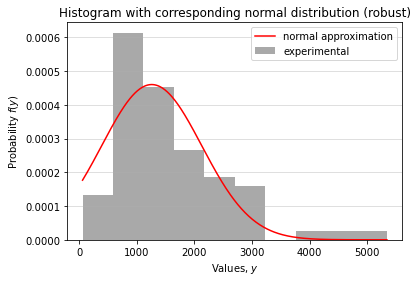

Estimation method: robust
n = 71, mu = 1260, sigma = 867.3
Expected number of data outside CI: 4


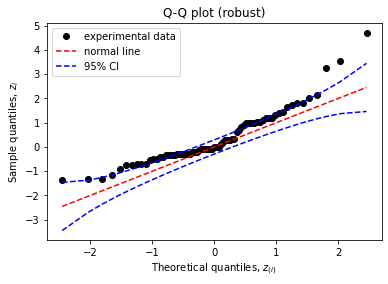

rem
Estimation method: robust
mu = 810, sigma = 544.8


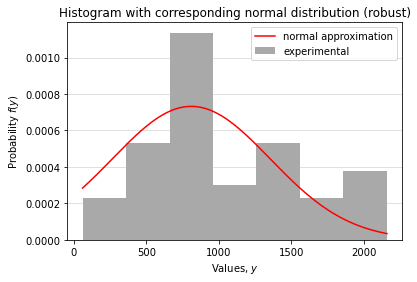

Estimation method: robust
n = 44, mu = 810, sigma = 544.8
Expected number of data outside CI: 2


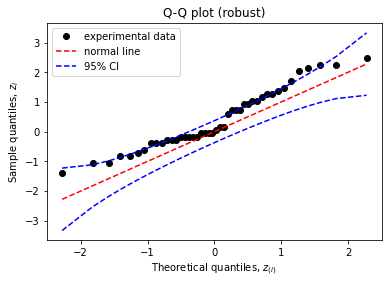

In [19]:
def normality_of_data_sleepduration():
    for sleeptype in ['deep', 'rem']:
        print(sleeptype)
        sleeptype = df.loc[(df['sleeptype_word'] == sleeptype)]['duration(s)'].to_list()
        DS_Q_Q_Hist(sleeptype)
        DS_Q_Q_Plot(sleeptype)
normality_of_data_sleepduration()  

awake
Estimation method: robust
mu = 64, sigma = 5.93


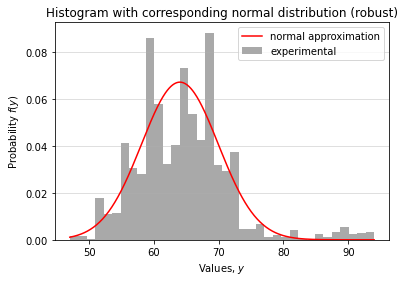

Estimation method: robust
n = 1777, mu = 64, sigma = 5.93
Expected number of data outside CI: 89


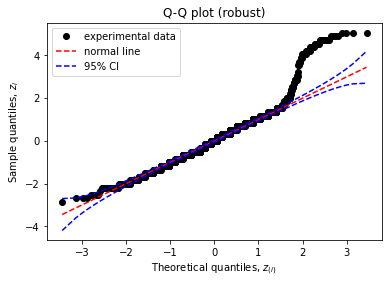

light
Estimation method: robust
mu = 61, sigma = 7.413


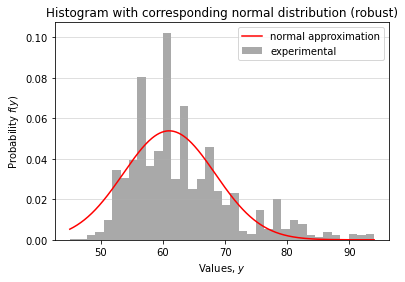

Estimation method: robust
n = 3103, mu = 61, sigma = 7.413
Expected number of data outside CI: 155


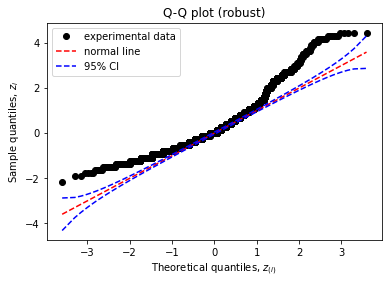

deep
Estimation method: robust
mu = 63, sigma = 6.672


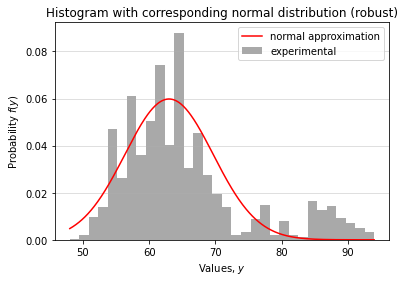

Estimation method: robust
n = 1867, mu = 63, sigma = 6.672
Expected number of data outside CI: 93


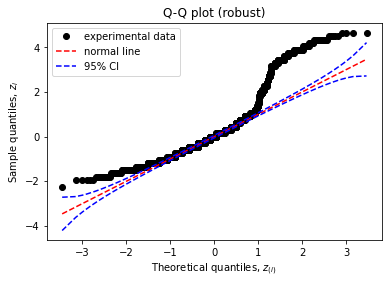

rem
Estimation method: robust
mu = 61, sigma = 6.672


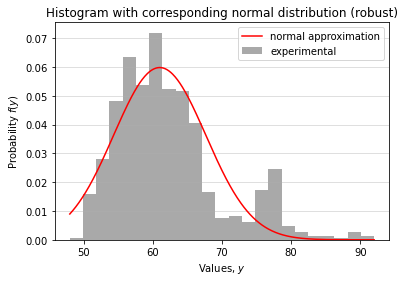

Estimation method: robust
n = 749, mu = 61, sigma = 6.672
Expected number of data outside CI: 37


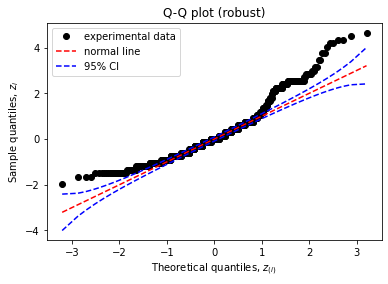

In [20]:
def normality_of_data_heartrate():
    for sleeptype in df['sleeptype_word'].unique():
        print(sleeptype)
        heartrate = list_of_data(df.loc[(df['person'] == '4') & (df['sleeptype_word'] == sleeptype)].groupby('day_of_sleep')['heartrate'].sum().to_list())
        DS_Q_Q_Hist(heartrate)
        DS_Q_Q_Plot(heartrate)
normality_of_data_heartrate()

None of the datasets follows a normal distribution so we will use a wilcoxontest to see if there is a significant difference in both the heartrate aswell as the sleepduration for deep and rem sleep

In [21]:
def wilcoxontest_heartrate():
    
    people = df['person'].unique()
    sleeptypes = df['sleeptype_word'].unique()
    
    
    for person in people:
       
        if person == '4':
            baseline_end = 7
 
        
        for sleeptype in sleeptypes:
            print(sleeptype)
                
            y_baseline = calculate_heartrate_average(df.loc[(df['person'] == person) & (df['sleeptype_word'] == sleeptype) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end))].groupby('day_of_sleep')['heartrate'].sum().to_list())
            y_meditation = calculate_heartrate_average(df.loc[(df['person'] == person) & (df['sleeptype_word'] == sleeptype) & (df['day_of_sleep'] >baseline_end)].groupby('day_of_sleep')['heartrate'].sum().to_list())
            
 
            print(wilcoxon(y_meditation, y_baseline, alternative='less'))
    pass    

wilcoxontest_heartrate()


awake
WilcoxonResult(statistic=3.0, pvalue=0.0390625)
light
WilcoxonResult(statistic=4.0, pvalue=0.0546875)
deep
WilcoxonResult(statistic=5.0, pvalue=0.078125)
rem
WilcoxonResult(statistic=3.0, pvalue=0.0390625)


In [22]:
def wilcoxontest_sleepduration():
    people = df['person'].unique()
    
    for person in people:
       
        if person == '4':
            baseline_end = 7
 
        
        for sleeptype in ['deep', 'rem']:
            print(sleeptype)
                
            y_baseline = df.loc[(df['person'] == '4') & (df['sleeptype_word'] == sleeptype) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=7))].groupby('day_of_sleep')['duration(s)'].mean()
            y_meditation = df.loc[(df['person'] == '4') & (df['sleeptype_word'] == sleeptype) & ((df['day_of_sleep'] >7))].groupby('day_of_sleep')['duration(s)'].mean()
             
            print(wilcoxon(y_meditation, y_baseline, alternative='greater'))
    pass    
wilcoxontest_sleepduration()

deep
WilcoxonResult(statistic=15.0, pvalue=0.46875)
rem
WilcoxonResult(statistic=22.0, pvalue=0.109375)


<h2>Making visualisations</h2>

<h3> plotting functions</h3>

<h4>sleepstage</h4>

In [23]:
def sleepstage_stepplot(day=1):
    baseline_end = 9
    p = figure(x_axis_type='datetime')
    p.step(x=df[df['day_of_sleep'] == day]['start'], y=df[df['day_of_sleep'] == day]['sleeptype'], mode="after")
    p.yaxis[0].ticker=FixedTicker(ticks=[0, 1, 2, 3])
    p.yaxis.major_label_overrides = {0:'Rem', 1:'Deep', 2:'Light', 3:'Awake'}
    p.xaxis.formatter=DatetimeTickFormatter(hours= "%H:%Mh")
    return p 

In [24]:
def average_heartrate(heartrate_list):
    heartrate_data = []
    for i in heartrate_list:
        for j in i:
            heartrate_data.append(int(j))
    heartrate = sum(heartrate_data)/len(heartrate_data) 
    return heartrate
    
def sleepstage_barplot(person='4'):

    if person == '4':
        baseline_end = 7
 
    #baseline
    total_sleep_base = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end))]['duration(s)'].sum()
    
    df_rem_base = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '0')]['duration(s)']
    rem_base = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '0')]['duration(s)'].sum()/total_sleep_base*100
    rem_base_count = len(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '0')]['duration(s)'])
    average_heartrate_rem_base = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '0')]['heartrate'].to_list())
  
    
    deep_base = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '1')]['duration(s)'].sum()/total_sleep_base*100
    deep_base_count = len(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '1')]['duration(s)'])
    average_heartrate_deep_base = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '1')]['heartrate'].to_list())

    
    light_base = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '2')]['duration(s)'].sum()/total_sleep_base*100
    light_base_count = len(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '2')]['duration(s)'])
    average_heartrate_light_base = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '2')]['heartrate'].to_list())
 
    
    awake_base = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '3')]['duration(s)'].sum()/total_sleep_base*100
    awake_base_count = len(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '3')]['duration(s)'])
    average_heartrate_awake_base = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '3')]['heartrate'].to_list())

    #meditation
    total_sleep_medi = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end))]['duration(s)'].sum()
    
    rem_medi = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '0')]['duration(s)'].sum()/total_sleep_medi*100
    rem_medi_count = len(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '0')]['duration(s)'])
    average_heartrate_rem_medi = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '0')]['heartrate'].to_list())
  
    
    deep_medi = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '1')]['duration(s)'].sum()/total_sleep_medi*100
    deep_medi_count = len(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '1')]['duration(s)'])
    average_heartrate_deep_medi = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '1')]['heartrate'].to_list())

    light_medi = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '2')]['duration(s)'].sum()/total_sleep_medi*100
    light_medi_count = len(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '2')]['duration(s)'])
    average_heartrate_light_medi = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '2')]['heartrate'].to_list())

    awake_medi = df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '3')]['duration(s)'].sum()/total_sleep_medi*100
    awake_medi_count = len(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '3')]['duration(s)'])
    average_heartrate_awake_medi = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '3')]['heartrate'].to_list())
   
    baseline = [rem_base, deep_base, light_base, awake_base]
    baseline_count = [rem_base_count, deep_base_count, light_base_count, awake_base_count]
    baseline_heartrate = [average_heartrate_rem_base, average_heartrate_deep_base, average_heartrate_light_base, average_heartrate_awake_base]
    
    meditation = [rem_medi, deep_medi, light_medi, awake_medi]
    meditation_count = [rem_medi_count, deep_medi_count, light_medi_count, awake_medi_count]
    meditation_heartrate = [average_heartrate_rem_medi, average_heartrate_deep_medi, average_heartrate_light_medi, average_heartrate_awake_medi]

    
    sleeptype = ["rem", "deep", "light", "awake"]
    
    data = {
        'sleeptype': sleeptype,
        'baseline': baseline,
        'meditation': meditation,
        'baseline_count':baseline_count,
        'meditation_count':meditation_count,
        'baseline_heartrate_average' : baseline_heartrate,
        'meditation_heartrate_average': meditation_heartrate,
   
    }
    
    
    source = ColumnDataSource(data=data)

    
    
    TOOLTIPS = [
    ("meditation count", "@meditation_count"),
    ("baseline count", "@baseline_count"),
    ("meditation heartrate average", "@meditation_heartrate_average"),
    ("baseline heartrate average", "@baseline_heartrate_average"),    
    ]
    p = figure(x_range=sleeptype, title='Difference between baseline and meditation', tooltips=TOOLTIPS)
    
   
    
    p.vbar(x=dodge('sleeptype', -0.25, range=p.x_range), top='baseline', source=source,
       width=0.2, color="#c9d9d3", legend_label="baseline")

    p.vbar(x=dodge('sleeptype',  0.0,  range=p.x_range), top='meditation', source=source,
       width=0.2, color="#718dbf", legend_label="meditation")
    
    p.xaxis.axis_label = "Sleeptype"
 
    p.yaxis.axis_label = "Sleepduration in percentage %"
    
    return p

<h4>heartrate</h4>

In [25]:
def heartrate_barchart ():
    baseline_end = 7
    person = '4'
    #rem
    average_heartrate_rem_base = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '0')]['heartrate'])
    average_heartrate_rem_medi = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '0')]['heartrate'].to_list())
    
    #deep 
    average_heartrate_deep_base = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '1')]['heartrate'])
    average_heartrate_deep_medi = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '1')]['heartrate'].to_list())
    
    #light
    average_heartrate_light_base = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '2')]['heartrate'])
    average_heartrate_light_medi = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '2')]['heartrate'].to_list())
    
    #awake
    average_heartrate_awake_base = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >=1) & (df['day_of_sleep'] <=baseline_end)) & (df['sleeptype'] == '3')]['heartrate'])
    average_heartrate_awake_medi = average_heartrate(df.loc[(df['person'] == person) & ((df['day_of_sleep'] >baseline_end)) & (df['sleeptype'] == '3')]['heartrate'].to_list())
    
    baseline_heartrate = [average_heartrate_rem_base, average_heartrate_deep_base, average_heartrate_light_base, average_heartrate_awake_base]
    meditation_heartrate = [average_heartrate_rem_medi, average_heartrate_deep_medi, average_heartrate_light_medi, average_heartrate_awake_medi]
    sleeptype = ["rem", "deep", "light", "awake"]

    data = {
        'sleeptype': sleeptype,
        'baseline_heartrate_average' : baseline_heartrate,
        'meditation_heartrate_average': meditation_heartrate,
    }
    
    source = ColumnDataSource(data=data)
    
    p = figure(x_range=sleeptype, title='Heartrate difference between baseline and meditation')
    
    p.vbar(x=dodge('sleeptype', -0.25, range=p.x_range), top='baseline_heartrate_average', source=source,
       width=0.2, color="#c9d9d3", legend_label="baseline")

    p.vbar(x=dodge('sleeptype',  0.0,  range=p.x_range), top='meditation_heartrate_average', source=source,
       width=0.2, color="#718dbf", legend_label="meditation")
    
    p.xaxis.axis_label = "Sleeptype"
 
    p.yaxis.axis_label = "Heartrate in percentage %"

    return p

<h4>Sleep score</h4>

In [26]:
def sleep_score_barchart():
    sleeptype = ["base1", "base2", "meditation1", "meditation2"]
    sleepscores = calculate_psqi_score(df4_PSQI)
    
    data = {
        'sleeptype': sleeptype,
        'sleepscores' : sleepscores,
    }
    
    source = ColumnDataSource(data=data)
    
    p = figure(x_range=sleeptype, title='Heartrate difference between baseline and meditation')
    p.vbar(x='sleeptype', top='sleepscores', source=source,
       width=0.5, color="#c9d9d3", legend_label="baseline")
    
    p.xaxis.axis_label = "Sleep with and without meditation"
 
    p.yaxis.axis_label = "PSQI score"
    return p


<h3>Visualizing</h3>

In [30]:
interact = pn.interact(sleepstage_barplot)
heartratebar = pn.interact(heartrate_barchart)
lineplot = pn.interact(sleepstage_stepplot, day=range(1, df['day_of_sleep'].max()+1))
psqi = pn.interact(sleep_score_barchart)

In [31]:
pn.Column(interact[0],
      interact[1], heartratebar, psqi, lineplot[0],
      lineplot[1]) 


Column
    [0] Column()
    [1] Row
        [0] Bokeh(Figure, name='interactive00141')
    [2] Column
        [0] Column()
        [1] Row
            [0] Bokeh(Figure, name='interactive00148')
    [3] Column
        [0] Column()
        [1] Row
            [0] Bokeh(Figure, name='interactive00169')
    [4] Column
        [0] DiscreteSlider(formatter='%d', name='day', options=[1, 2, 3, 4, 5, ...], value=1)
    [5] Row
        [0] Bokeh(Figure, name='interactive00154')

<h2> Conclusions</h2>

<p>The participant did sleep better while using meditation before going to sleep. The participant had a significant decrease in heartrate during awake and rem sleep. The sleep duration did not show a significant increase in rem or deep sleep.